# Librerias necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importamos los csv que guardamos anteriormente de los 3 países.

Unimos las bases de datos:

In [6]:
espana = pd.read_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos España/Datos hogar/espana.csv',sep=",")
eeuu = pd.read_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/eeuu.csv',sep=",")
argentina = pd.read_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/argentina.csv',sep=",")

In [7]:
datos = {'Pais': ['Espana', 'Espana', 'Espana', 'Espana', 'EEUU', 'EEUU', 'EEUU', 'EEUU', 'Argentina', 'Argentina', 'Argentina', 'Argentina'],
        'Anio': [2016, 2018, 2020, 2022]*3,
        'Victimas_Violencia_Genero': [6281, 6986, 8018, 10798, 368921, 363393, 298628, 319950, 13787, 14277, 15796, 17069]}
vic_violencia = pd.DataFrame(datos)
vic_violencia


,Pais,Anio,Victimas_Violencia_Genero
0,Espana,2016,6281
1,Espana,2018,6986
2,Espana,2020,8018
3,Espana,2022,10798
4,EEUU,2016,368921
5,EEUU,2018,363393
6,EEUU,2020,298628
7,EEUU,2022,319950
8,Argentina,2016,13787
9,Argentina,2018,14277


In [8]:
df = pd.concat([espana, eeuu, argentina], ignore_index=True)
df['Pais'] = pd.Series(['EEUU']*4 + ['Argentina']*4 + ['Espana']*4)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,Pais,Anio,Clase_Social_Alta,Clase_Social_Media,Clase_Social_Baja
0,EEUU,2016,6010,7580,6010
1,EEUU,2018,6155,7223,7278
2,EEUU,2020,5882,6444,6342
3,EEUU,2022,6692,7164,6193
4,Argentina,2016,12903,47574,9016
5,Argentina,2018,10312,45892,10548
6,Argentina,2020,12000,42440,8745
7,Argentina,2022,11444,44598,8099
8,Espana,2016,626,6696,11474
9,Espana,2018,973,10822,6791


In [10]:
df['Victimas_Violencia_Genero'] = datos['Victimas_Violencia_Genero']
df

,Pais,Anio,Clase_Social_Alta,Clase_Social_Media,Clase_Social_Baja,Victimas_Violencia_Genero
0,EEUU,2016,6010,7580,6010,6281
1,EEUU,2018,6155,7223,7278,6986
2,EEUU,2020,5882,6444,6342,8018
3,EEUU,2022,6692,7164,6193,10798
4,Argentina,2016,12903,47574,9016,368921
5,Argentina,2018,10312,45892,10548,363393
6,Argentina,2020,12000,42440,8745,298628
7,Argentina,2022,11444,44598,8099,319950
8,Espana,2016,626,6696,11474,13787
9,Espana,2018,973,10822,6791,14277


Calculamos la correlación entre las clases sociales y el número total de víctimas de violencia de género.

In [43]:
correlacion_clase_baja = df["Clase_Social_Baja"].corr(df["Victimas_Violencia_Genero"])
correlacion_clase_media = df["Clase_Social_Media"].corr(df["Victimas_Violencia_Genero"])
correlacion_clase_alta = df["Clase_Social_Alta"].corr(df["Victimas_Violencia_Genero"])
print("Correlación entre Clase Social Baja y Víctimas de Violencia de Género:", correlacion_clase_baja)
print("Correlación entre Clase Social Media y Víctimas de Violencia de Género:", correlacion_clase_media)
print("Correlación entre Clase Social Alta y Víctimas de Violencia de Género:", correlacion_clase_alta)


Correlación entre Clase Social Baja y Víctimas de Violencia de Género: 0.8132348740860089
Correlación entre Clase Social Media y Víctimas de Violencia de Género: 0.8311398422563391
Correlación entre Clase Social Alta y Víctimas de Violencia de Género: 0.51848551146794


Como vemos, la correlación entre víctimas de violencia de género y clase social es mayor cuanto menor sea el nivel de clase social.

A continuación, estandarizaremos nuestras variables, ya que las muestras de cada país tienen tamaños diferentes y esto puede haber afectado la correlación.

In [44]:
#Copiamos para estandarizar
copia_datos=df.copy()

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Clase_Social_Baja', 'Clase_Social_Media', 'Clase_Social_Alta', 'Victimas_Violencia_Genero']
copia_datos[columns] = scaler.fit_transform(copia_datos[columns])

In [46]:
correlacion2 = copia_datos.corr()
correlacion2

C:\Users\carpa\AppData\Local\Temp\ipykernel_1888\2139919840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion2 = copia_datos.corr()


,Anio,Clase_Social_Alta,Clase_Social_Media,Clase_Social_Baja,Victimas_Violencia_Genero
Anio,1.000000,-0.004604,-0.041328,-0.179873,-0.132572
Clase_Social_Alta,-0.004604,1.000000,0.856334,-0.023542,0.518486
Clase_Social_Media,-0.041328,0.856334,1.000000,0.352319,0.831140
Clase_Social_Baja,-0.179873,-0.023542,0.352319,1.000000,0.813235
Victimas_Violencia_Genero,-0.132572,0.518486,0.831140,0.813235,1.000000


Como vemos, los resultados son los mismos que antes de la estandarización. 

Ahora estudiaremos el mapa de calor (heatmap) que representa la correlación entre la violencia de género y las clases sociales:

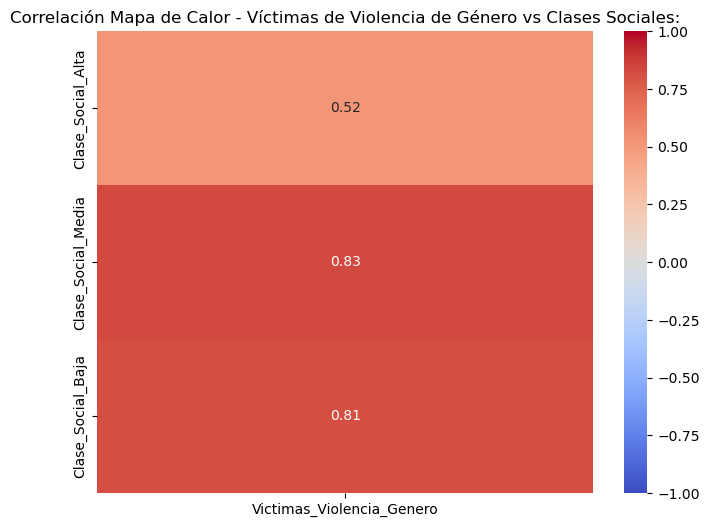

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
filtered_correlacion = correlacion2.loc[
    ['Clase_Social_Alta', 'Clase_Social_Media', 'Clase_Social_Baja'],
    ['Victimas_Violencia_Genero']
]
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Mapa de Calor - Víctimas de Violencia de Género vs Clases Sociales:')
plt.show()

Ahora veamos la relación entre los diferentes años estudiados y el número de víctimas de violencia de género:

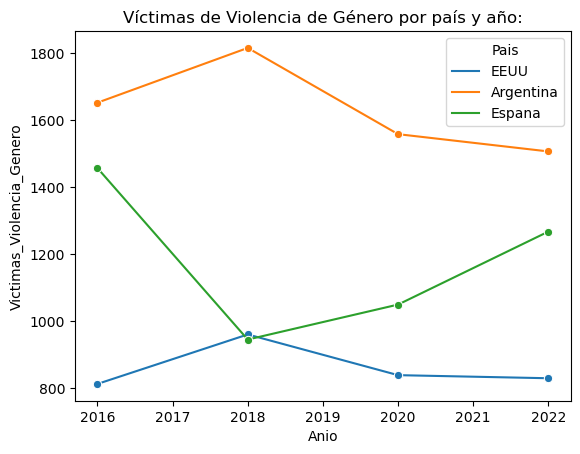

In [48]:
#Gráfico de líneas
sns.lineplot(df, x='Anio', y='Victimas_Violencia_Genero', hue='Pais', marker='o')
plt.title('Víctimas de Violencia de Género por país y año:')
plt.show()

Veamos detenidamente el caso de EE. UU.:

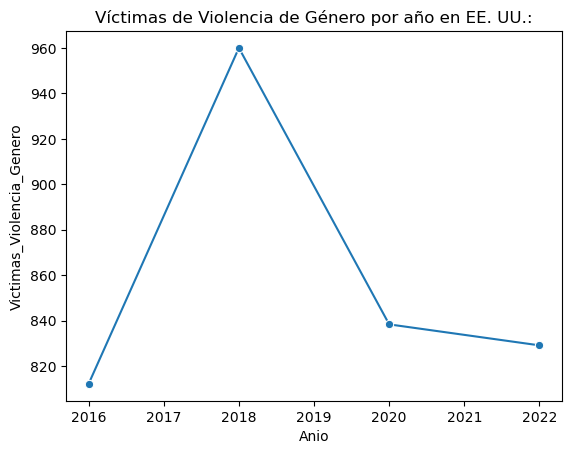

In [49]:
sns.lineplot(df[df['Pais']=='EEUU'], x='Anio', y='Victimas_Violencia_Genero', marker='o')
plt.title('Víctimas de Violencia de Género por año en EE. UU.:')
plt.show()

Ahora veamos el caso de España y Argentina:

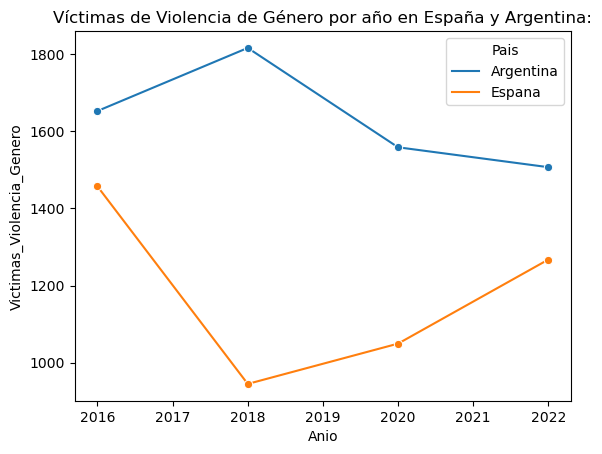

In [50]:
#Look only at Argentina and Spain
sns.lineplot(df[df['Pais'] != 'EEUU'], x='Anio', y='Victimas_Violencia_Genero', hue='Pais', marker='o')
plt.title('Víctimas de Violencia de Género por año en España y Argentina:')
plt.show()

En el siguiente gráfico de barras, podemos ver el porcentaje de cada clase social por país:

C:\Users\carpa\AppData\Local\Temp\ipykernel_1888\3595455615.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Anio', y='Porcentaje', hue='Clase_Social', ci=None, dodge=True, palette='viridis')


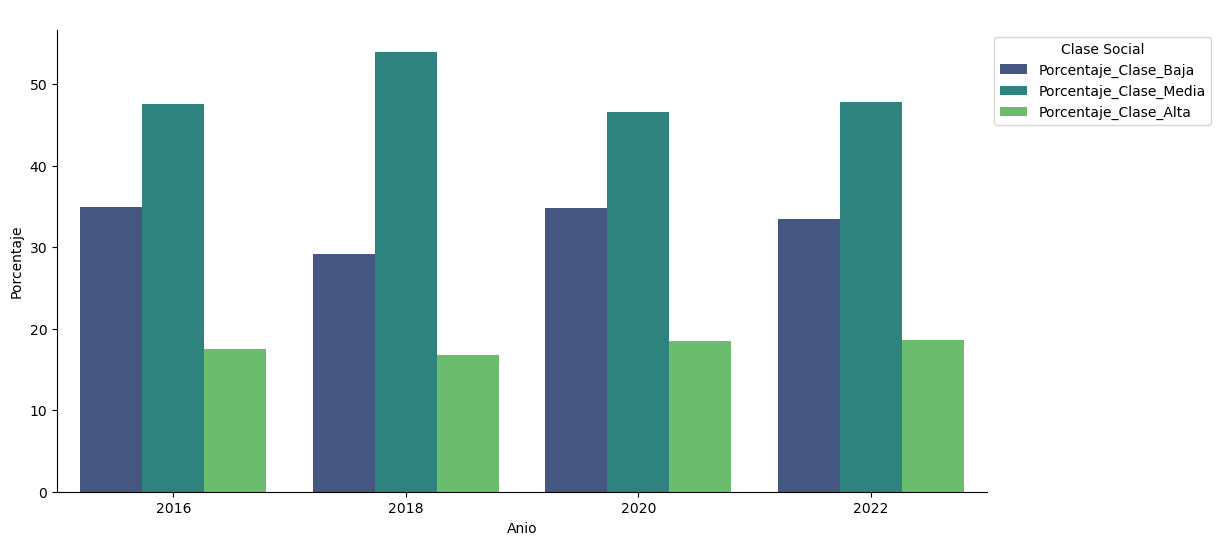

In [51]:
#Total population
df['Poblacion_Total'] = df['Clase_Social_Baja'] + df['Clase_Social_Media'] + df['Clase_Social_Alta']
# Percentage of each social class
df['Porcentaje_Clase_Baja'] = df['Clase_Social_Baja'] / df['Poblacion_Total'] * 100
df['Porcentaje_Clase_Media'] = df['Clase_Social_Media'] / df['Poblacion_Total'] * 100
df['Porcentaje_Clase_Alta'] = df['Clase_Social_Alta'] / df['Poblacion_Total'] * 100
df_melted = df.melt(id_vars=['Pais', 'Anio'], value_vars=['Porcentaje_Clase_Baja', 'Porcentaje_Clase_Media', 'Porcentaje_Clase_Alta'], var_name='Clase_Social', value_name='Porcentaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Anio', y='Porcentaje', hue='Clase_Social', ci=None, dodge=True, palette='viridis')
plt.title(' ')
plt.legend(title='Clase Social', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

C:\Users\carpa\AppData\Local\Temp\ipykernel_1888\3109231875.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Pais', y='Porcentaje', hue='Clase_Social', ci=None, dodge=True, palette='viridis')


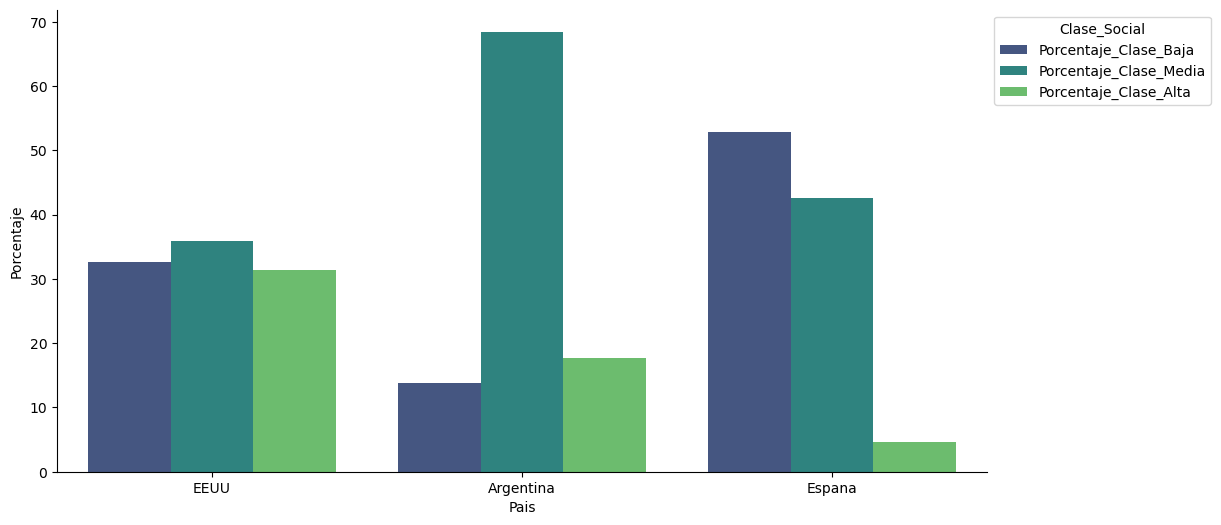

In [52]:
#Total population
df['Poblacion_Total'] = df['Clase_Social_Baja'] + df['Clase_Social_Media'] + df['Clase_Social_Alta']
# Percentage of each social class
df['Porcentaje_Clase_Baja'] = df['Clase_Social_Baja'] / df['Poblacion_Total'] * 100
df['Porcentaje_Clase_Media'] = df['Clase_Social_Media'] / df['Poblacion_Total'] * 100
df['Porcentaje_Clase_Alta'] = df['Clase_Social_Alta'] / df['Poblacion_Total'] * 100
df_melted = df.melt(id_vars=['Anio', 'Pais'], value_vars=['Porcentaje_Clase_Baja', 'Porcentaje_Clase_Media', 'Porcentaje_Clase_Alta'], var_name='Clase_Social', value_name='Porcentaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Pais', y='Porcentaje', hue='Clase_Social', ci=None, dodge=True, palette='viridis')
plt.title('')
plt.legend(title='Clase_Social', loc='upper left', bbox_to_anchor=(1, 1)) 
sns.despine()
plt.show()



In [53]:
total_Clase_Baja = df.Clase_Social_Baja.sum()
print('total_Clase_Baja: %s' % total_Clase_Baja)
total_Clase_Media = df.Clase_Social_Media.sum()
print('total_Clase_Media: %s' % total_Clase_Media)
total_Clase_Alta = df.Clase_Social_Alta.sum()
print('total_Clase_Alta: %s' % total_Clase_Alta)

total_Clase_Baja: 98588
total_Clase_Media: 238584
total_Clase_Alta: 74563


In [54]:
vic_violencia

,Pais,Anio,Victimas_Violencia_Genero
0,Espana,2016,6281
1,Espana,2018,6986
2,Espana,2020,8018
3,Espana,2022,10798
4,EEUU,2016,368921
5,EEUU,2018,363393
6,EEUU,2020,298628
7,EEUU,2022,319950
8,Argentina,2016,13787
9,Argentina,2018,14277


In [55]:
# Víctimas totales por país
paises_totales = vic_violencia.groupby('Pais')['Victimas_Violencia_Genero'].sum().reset_index(name='Casos_Totales')
df_unido = vic_violencia.merge(paises_totales, on='Pais')

# Calculate the percentage of cases for each year and country
df_unido['Porcentaje'] = (df_unido['Victimas_Violencia_Genero'] / df_unido['Casos_Totales']) * 100


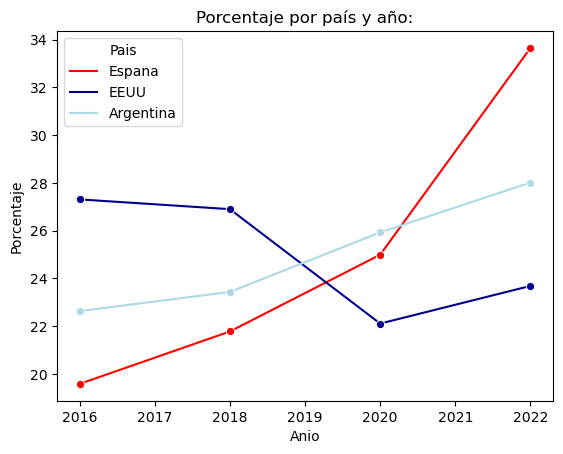

In [56]:
# Colores
colors = {"Espana": "red", "Argentina": "darkblue", "EEUU": "lightblue"}

# Gráfico de líneas con paleta de colores personalizada
sns.lineplot(data=df_unido, x='Anio', y='Porcentaje', hue='Pais', marker='o', palette=colors.values())
plt.title('Porcentaje por país y año:')
plt.show()


In [94]:
paises = ['Espana', 'Argentina', 'EEUU']

for pais in paises:
    df_pais = df[df['Pais'] == pais]
    
    correlacion_clase_alta = df_pais["Clase_Social_Alta"].corr(df_pais["Victimas_Violencia_Genero"])
    correlacion_clase_media = df_pais["Clase_Social_Media"].corr(df_pais["Victimas_Violencia_Genero"])
    correlacion_clase_baja = df_pais["Clase_Social_Baja"].corr(df_pais["Victimas_Violencia_Genero"])
    
    print(f"Correlación en {pais}:")
    print("Correlación entre Clase Social Alta y Víctimas de Violencia de Género:", correlacion_clase_alta)
    print("Correlación entre Clase Social Media y Víctimas de Violencia de Género:", correlacion_clase_media)
    print("Correlación entre Clase Social Baja y Víctimas de Violencia de Género:", correlacion_clase_baja)

    print("\n")

Correlación en Espana:
Correlación entre Clase Social Alta y Víctimas de Violencia de Género: 0.07540130176697649
Correlación entre Clase Social Media y Víctimas de Violencia de Género: 0.567131340070189
Correlación entre Clase Social Baja y Víctimas de Violencia de Género: 0.32658559327091186


Correlación en Argentina:
Correlación entre Clase Social Alta y Víctimas de Violencia de Género: -0.08495886181520855
Correlación entre Clase Social Media y Víctimas de Violencia de Género: 0.9337789938169336
Correlación entre Clase Social Baja y Víctimas de Violencia de Género: 0.66502879915704


Correlación en EEUU:
Correlación entre Clase Social Alta y Víctimas de Violencia de Género: 0.1288070763149443
Correlación entre Clase Social Media y Víctimas de Violencia de Género: 0.613370128557314
Correlación entre Clase Social Baja y Víctimas de Violencia de Género: 0.7461148521798349




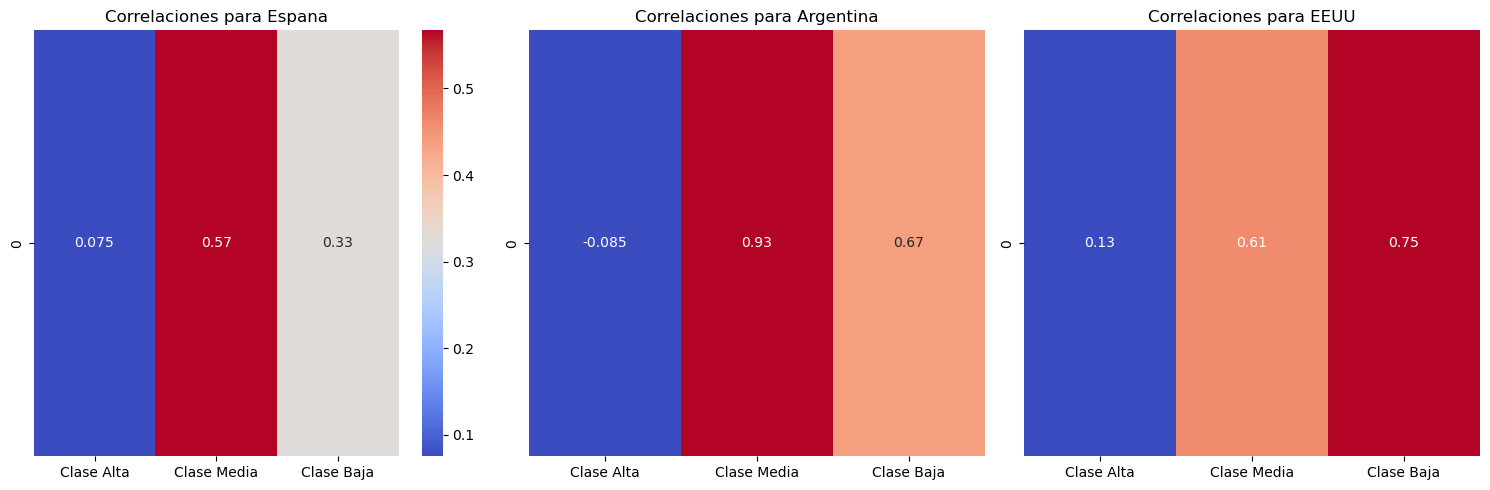

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define los países y las correlaciones
paises = ['Espana', 'Argentina', 'EEUU']
correlaciones = []

for pais in paises:
    df_pais = df[df['Pais'] == pais]
    
    correlacion_clase_alta = df_pais["Clase_Social_Alta"].corr(df_pais["Victimas_Violencia_Genero"])
    correlacion_clase_media = df_pais["Clase_Social_Media"].corr(df_pais["Victimas_Violencia_Genero"])
    correlacion_clase_baja = df_pais["Clase_Social_Baja"].corr(df_pais["Victimas_Violencia_Genero"])
    
    correlaciones.append([correlacion_clase_alta, correlacion_clase_media, correlacion_clase_baja])

# Crea una figura con tres subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera sobre los subgráficos y dibuja los mapas de calor
for i, pais in enumerate(paises):
    ax = axs[i]
    sns.heatmap(data=[correlaciones[i]], annot=True, cmap="coolwarm", ax=ax, cbar=i==0)
    ax.set_title(f"Correlaciones para {pais}")
    ax.set_xticklabels(['Clase Alta', 'Clase Media', 'Clase Baja'])

# Ajusta el espaciado entre subgráficos
plt.tight_layout()
plt.show()
